In [3]:
from pgmpy.factors.discrete import TabularCPD
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.inference.ExactInference import VariableElimination

import networkx as nx

(L ⟂ O | S)
(M ⟂ O | L, S)
(O ⟂ M, L | S)


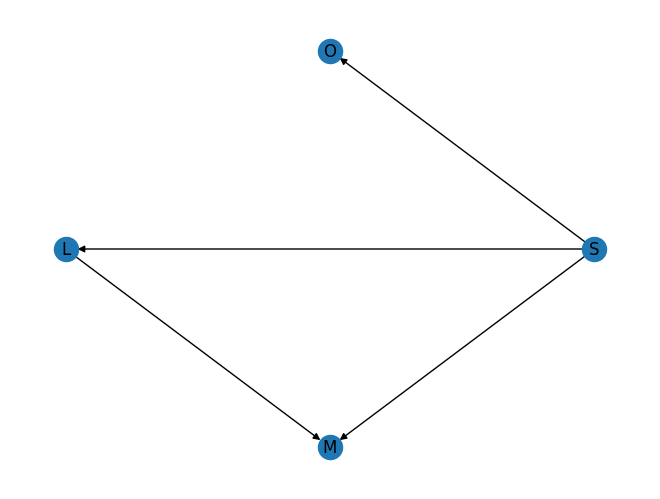

In [4]:
# a)

model = DiscreteBayesianNetwork([
    ('S', 'O'),
    ('S', 'L'),
    ('S', 'M'),
    ('L', 'M')
])

cpd_S = TabularCPD('S', 2, [[0.4], [0.6]])

cpd_O = TabularCPD('O', 2, [[0.7, 0.1],
                            [0.3, 0.9]],
                            evidence=['S'],
                            evidence_card=[2])

cpd_L = TabularCPD('L', 2, [[0.8, 0.3],
                            [0.2, 0.7]],
                            evidence=['S'],
                            evidence_card=[2])

cpd_M = TabularCPD('M', 2, [[0.9, 0.5, 0.6, 0.2],
                            [0.1, 0.5, 0.4, 0.8]],
                            evidence=['S', 'L'],
                            evidence_card=[2, 2])

model.add_cpds(cpd_S, cpd_O, cpd_L, cpd_M)
assert model.check_model()
independencies = model.local_independencies(['S', 'L', 'M', 'O'])
print(independencies)

pos = nx.circular_layout(model)
nx.draw(model, with_labels=True, pos=pos)

In [5]:
# b)

infer = VariableElimination(model)
cases = [
    {'O': 0, 'L': 0, 'M': 0},
    {'O': 0, 'L': 0, 'M': 1},
    {'O': 0, 'L': 1, 'M': 0},
    {'O': 0, 'L': 1, 'M': 1},
    {'O': 1, 'L': 0, 'M': 0},
    {'O': 1, 'L': 0, 'M': 1},
    {'O': 1, 'L': 1, 'M': 0},
    {'O': 1, 'L': 1, 'M': 1},
]

for case in cases:
    result = infer.query(['S'], evidence=case)
    print(f"For case {case} the spam probability is: {result.values[1]:.4f}")
    print(result)

For case {'O': 0, 'L': 0, 'M': 0} the spam probability is: 0.0508
+------+----------+
| S    |   phi(S) |
+======+==========+
| S(0) |   0.9492 |
+------+----------+
| S(1) |   0.0508 |
+------+----------+
For case {'O': 0, 'L': 0, 'M': 1} the spam probability is: 0.2432
+------+----------+
| S    |   phi(S) |
+======+==========+
| S(0) |   0.7568 |
+------+----------+
| S(1) |   0.2432 |
+------+----------+
For case {'O': 0, 'L': 1, 'M': 0} the spam probability is: 0.2308
+------+----------+
| S    |   phi(S) |
+======+==========+
| S(0) |   0.7692 |
+------+----------+
| S(1) |   0.2308 |
+------+----------+
For case {'O': 0, 'L': 1, 'M': 1} the spam probability is: 0.5455
+------+----------+
| S    |   phi(S) |
+======+==========+
| S(0) |   0.4545 |
+------+----------+
| S(1) |   0.5455 |
+------+----------+
For case {'O': 1, 'L': 0, 'M': 0} the spam probability is: 0.5294
+------+----------+
| S    |   phi(S) |
+======+==========+
| S(0) |   0.4706 |
+------+----------+
| S(1) |  